<br>
<font color=blue  size=6 face="微軟正黑體">期末專案進度報告</font> 
<br>
<br>
<font color="#000080"  size=5 face="微軟正黑體">主題 : 使用深度學習來識別蔬果</font> 
<br>
<font color="#000080"  size=5 face="微軟正黑體">組員 : 胡嘉展(Joser Hu) , 紀弘俊(David Chi)</font>  

<font color="#000080" size=3 face="微軟正黑體"> 
識別蔬果圖像內容包括 : 蘋果，梨，香蕉，仙人掌果，哈密瓜，櫻桃，萊姆，，番茄，
葡萄，葡萄柚，番石榴，榛子，桃，柿子，大頭菜，檸檬，荔枝，柑，芒果，芒果，甜瓜，桑樹，
橙，木瓜，百香果，桃，鳳梨，辣椒，菠蘿，石榴，柚子蜜，木瓜，紅毛丹，覆盆子，紅醋栗，草莓.....
</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 方法 : 使用卷積神經網路CNN(Convolutional neural network)流程</font>  
<img src="CNN_1.png" alt="drawing" style="width: 800px;"/>

<br>
<font color=Red size=3 face="微軟正黑體">[輸入]</font>
<br>
* 圖像大小：100x100 Pixel
* 訓練圖像數量: 52,262
* 測試圖像數量: 17,540張圖

<br>
<font color=Red size=3 face="微軟正黑體"> [輸出]</font>
<br>
* 可分辨蔬果分類數量：101 種水果
* 識別圖像來源 : 經由水果測試圖像進行預測識別出水果種類。

<br>
<font color=Red size=3 face="微軟正黑體">[訓練資料結構]</font>
<br>
1. 建立101種 "英文水果名稱" 目錄，按照英文字母由a~z排列出順序，大約 (0~100) 個目錄。
2. 標註Label (y_train)   : 水果目錄順序碼
3. 特徵Feature (x_train) : 水果目錄下圖像檔

<font color="#000080"  size=5 face="微軟正黑體"> 建立卷積神經網路識別水果資料集步驟</font>  
<img src="CNN_2.png" alt="drawing" style="width: 800px;"/>

<font color=blue  size=5 face="微軟正黑體" > 1. 資料收集 </font> 
<font color="#000080" size=3 face="微軟正黑體"  > 開始構建CNN，對fruits數據集進行多類分類，共有69,908個圖像，分為兩個文件夾 :  </font>
1. 訓練集 : 52,262 筆圖像
2. 測試集 : 17,540 筆圖像

<font color=blue  size=5 face="微軟正黑體" > 2. 資料預處理(Preprocess) </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 2.1 將圖片資料依水果分類(特徵Feature)及建立分類水果真實名稱為目錄(標註Label) </font> 

In [1]:
# 將圖片檔名及目標標籤載到numpy數組陣列中！
from sklearn.datasets import load_files
import numpy as np

train_dir = './fruits-360/Training'
test_dir = './fruits-360/Test'


def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set qty : ' , x_train.shape[0]) 
print('Testing set qty : ', x_test.shape[0])

Loading complete!
Training set qty :  52262
Testing set qty :  17540


In [2]:
# 檢視圖像檔案及標籤
x_train, y_train

(array(['./fruits-360/Training\\Tomato 2\\134_100.jpg',
        './fruits-360/Training\\Cherry Wax Black\\r_9_100.jpg',
        './fruits-360/Training\\Apple Braeburn\\180_100.jpg', ...,
        './fruits-360/Training\\Pomegranate\\260_100.jpg',
        './fruits-360/Training\\Quince\\45_100.jpg',
        './fruits-360/Training\\Apple Granny Smith\\r_177_100.jpg'],
       dtype='<U55'), array([95, 25,  0, ..., 83, 85,  5]))

In [3]:
# 確認水果種類數量
no_of_classes = len(np.unique(y_train))
no_of_classes

101

In [4]:
# 更改為101個單位向量
print(y_train[0:10])

[95 25  0 68 53 82 33 82 45 63]


In [5]:
from keras.models import model_from_json
from keras.utils import np_utils
# CNN 輸出層的每筆 Data 都是一維陣列
# 所以, 需將 Train & Test Label 資料轉換為 One-Hot Encoding 
y_train = np_utils.to_categorical(y_train,no_of_classes) # 將類向量（整數）轉換為二進制類矩陣 one hot encoding
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

<font color="#000080"  size=3 face="微軟正黑體" > 2.2 將資料集劃分為測試和驗證集 </font> 

In [6]:
# 將驗證資料劃分為測試和驗證標籤
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 101)
Test X :  (10540,)
Test y :  (10540, 101)


In [7]:
x_train[0]
# 訓練數據只是圖像檔名，需要將它們轉換為像素矩陣

'./fruits-360/Training\\Tomato 2\\134_100.jpg'

In [8]:
x_train[1]

'./fruits-360/Training\\Cherry Wax Black\\r_9_100.jpg'

<font color="#000080"  size=3 face="微軟正黑體" > 2.3 將像素轉換為數據矩陣</font> 

In [9]:
# 將圖像載入和轉入陣列內
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))   
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training data shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation data shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test data shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training data shape :  (52262, 100, 100, 3)
Validation data shape :  (7000, 100, 100, 3)
Test data shape :  (10540, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [10]:
print('1st training image as array',x_train[0]) 

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [11]:
# 將資料線性單位化至  [0,1] 。
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [ ]:
# 將資料線性單位化至  [0,1] 。
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

In [12]:
# 檢查一下
x_train.min(), x_train.max()

(0.0, 1.0)

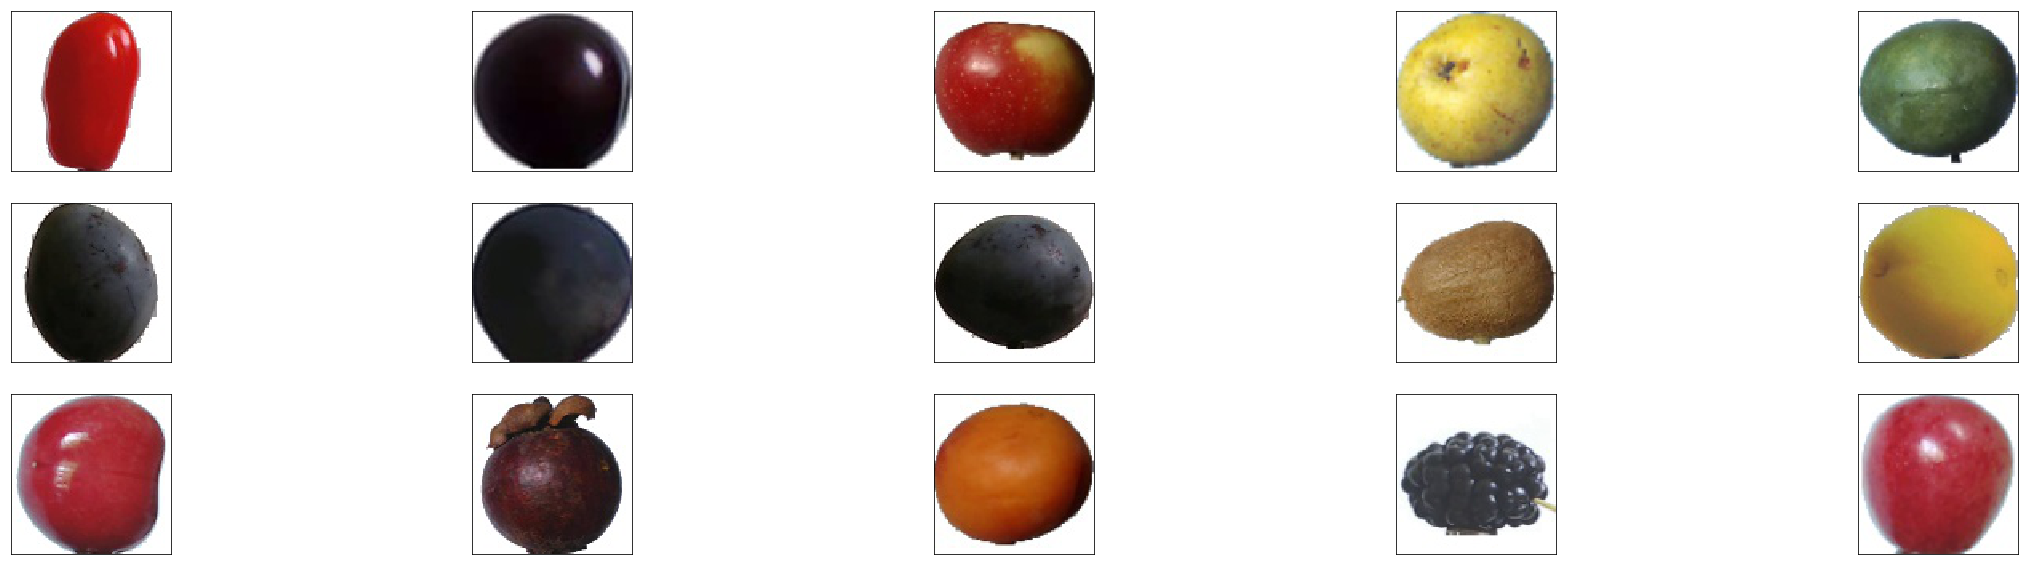

In [14]:
# 可視化前15個訓練圖像！
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(40,10))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[]) # (nrows, ncols, index, **kwargs) kwargs: xticks->list yticks->list only
    ax.imshow(np.squeeze(x_train[i]))  
    

<font color=blue  size=5 face="微軟正黑體" > 3. 建立模型 </font> 
* 建立CNN 模型，輸入水果圖像，透過卷積層、池化層、提取圖像特徵，再以完全連結神經網路，包括平坦層、隱藏層、輸出層，組成神經網路
* 研讀並選擇合適的Loss functions

In [15]:
# 建立CNN神經網路 - 使用3個Conv層，然後是maxpooling層
# 最後添加dropout，flatten和 fully connected layers(Dense)

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

# 建立空的神經網路學習機
model = Sequential()

# 逐層建立神經網路，模型加入【輸入層】與【第一層卷積層】
# 產生 16 個類似濾鏡效果的卷積圖片,輸入層為 (100, 100, 3) 的三維陣列,卷積圖片大小與原始圖片一樣,也就是 100x100
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))# 定義conv2d 函數，進行卷積運算  
model.add(Activation('relu'))                                                          # 使用 relu 激活函數
model.add(MaxPooling2D(pool_size=2))                                                   # 模型加入【第一層池化層】
                                                                                       # 以 2x2 進行縮減取樣
                                                                                       # 卷積圖片若為 100x100, 則縮減取樣後的圖片為 50x50
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))                                                               # 加入Dropout避免overfitting，保留70%神經元
model.add(Flatten())                                                                  # 模型加入【平坦層】
model.add(Dense(150))                                                                 # 隱藏層有 150 個神經元 (值越大, 訓練越精準, 相對訓練時間也越久)
model.add(Activation('relu'))                                                         # 使用 relu 激活函數
model.add(Dropout(0.4))                                                               # 加入Dropout避免overfitting，保留60%神經元
model.add(Dense(101,activation = 'softmax'))                                          # 模型加入【輸出層】 有 101 個神經元
                                                                                      # 使用 softmax 激活函數 (softmax 值越高, 代表機率越大)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [17]:
# 設定模型的訓練方式
model.compile(loss='categorical_crossentropy',              # 設定 Loss 損失函數 為 categorical_crossentropy
              optimizer='rmsprop',                          # 設定 Optimizer 最佳化方法 為 adam
              metrics=['accuracy'])                         # 設定 Model 評估準確率方法 為 accuracy

<br>
<font color=red  size=7 face="微軟正黑體"> ------------目前進度以上------------</font>  

<font color=blue  size=5 face="微軟正黑體" > 4. 訓練模型 </font> 

<font color="#000080"  size=3 face="微軟正黑體" > 提升準確率方式有 : </font> 
<br>
* 可再執行這個函數,進行重覆訓練
* 增加 卷積層 filter 數
* 增加 隱藏層 units 神經元數
* 增加 隱藏層 layer
* 更換訓練神經網路<br>

<font color="#000080"  size=3 face="微軟正黑體" > 訓練說明 : </font> 
<br>
* 模型的保存及重用
* 每次訓練結束後回調比對，並保存最好的模型於hdf5。
* 輸入訓練資料，Feature 水果圖像特徵值與Label水果真實名稱
* 執行15次訓練週期，每一批次50筆資料

In [ ]:
# 定義訓練參數，訓練的歷史記錄, 會回傳到指定變數 history

<font color=black  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測，逐次顯示訓練結果 </font> 
<br>
<font color=black  size=2 face="微軟正黑體" >
. loss:     使用訓練資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)<br>
. acc:      使用訓練資料, 得到的評估準確率     (值在 0~1, 值越大, 代表準確率越高)<br>
. val_loss: 使用驗證資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)<br>
. val_acc:  使用驗證資料, 得到的評估準確率     (值在 0~1, 值越大, 代表準確率越高)</font> 

<font color=blue  size=5 face="微軟正黑體" > 5. 評估模型準確率 </font> 

<font color=blue  size=5 face="微軟正黑體" > 6. 進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 可視化測試預測結果, 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth) </font> 

<font color=blue  size=5 face="微軟正黑體" > 7. 結果報告 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 檢視損失和準確性結果 </font> 